In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.8 MB/s 
     |████████████████████████████████| 49 kB 4.4 MB/s 
     |████████████████████████████████| 179 kB 9.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640015 sha256=8aaa7cf3b1b6098d28db20a5e4009bb731f942c5db7663f5ef73c022f52f1d18
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2021-08-02 01:54:45--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  15.0MB/s    in 1.6s    

2021-08-02 01:54:47 (15.0 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [ ]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [ ]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

In [ ]:
goog.head()

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956


In [ ]:
goog.columns = ['y']
goog['ds'] = goog.index

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


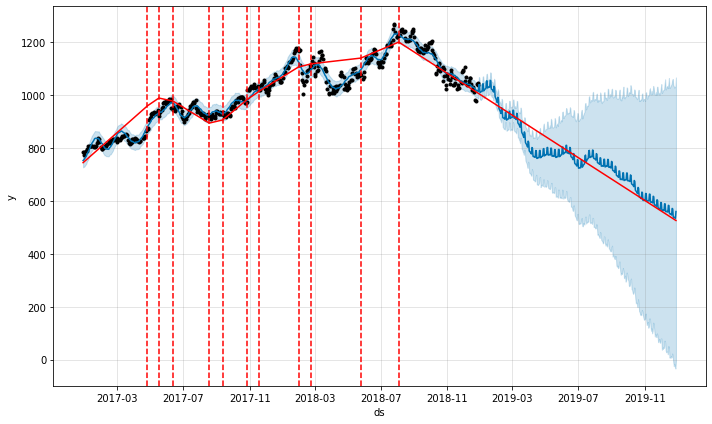

In [ ]:
m = Prophet()
m.fit(goog.iloc[-252*2:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

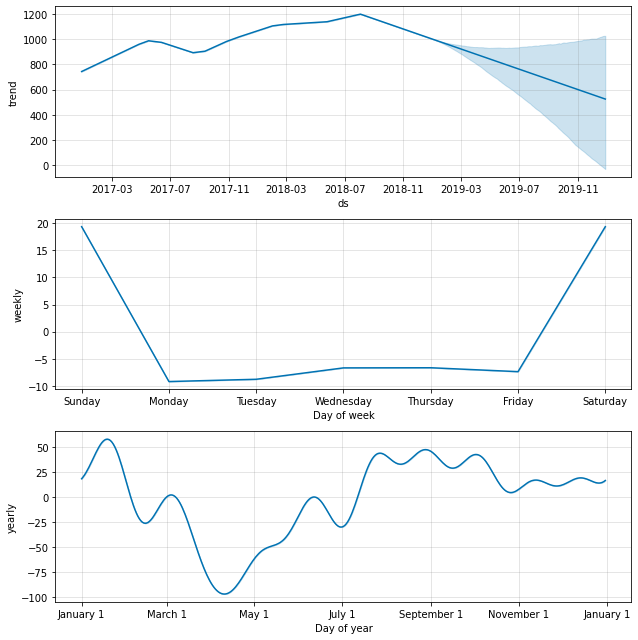

In [ ]:
m.plot_components(forecast);

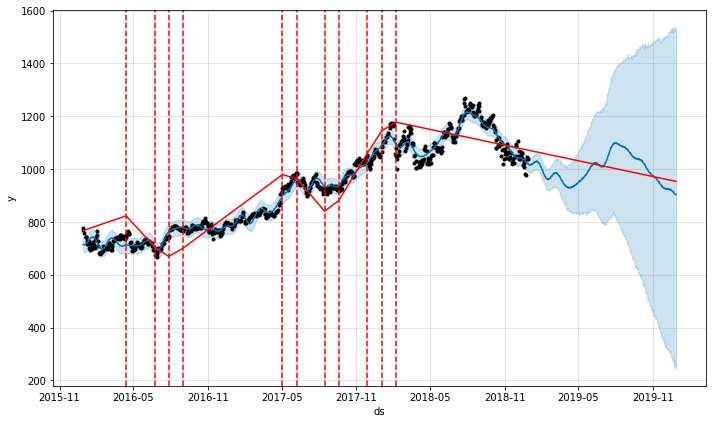

In [ ]:
# BAD!!! From blog articles
m = Prophet(daily_seasonality=True)
m.fit(goog.iloc[-252*3:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

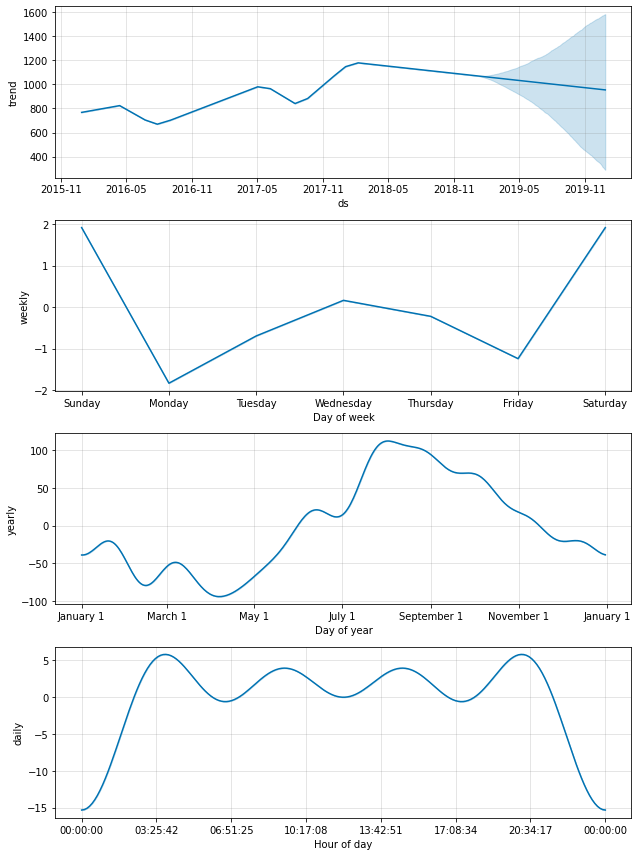

In [ ]:
m.plot_components(forecast);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


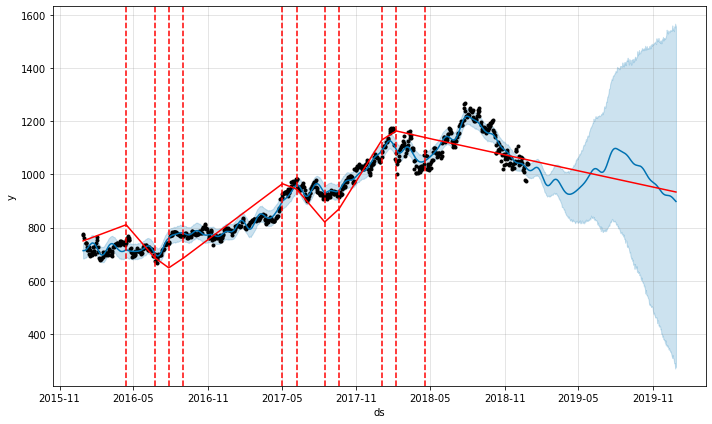

In [ ]:
m = Prophet(weekly_seasonality=False)
m.fit(goog.iloc[-252*3:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

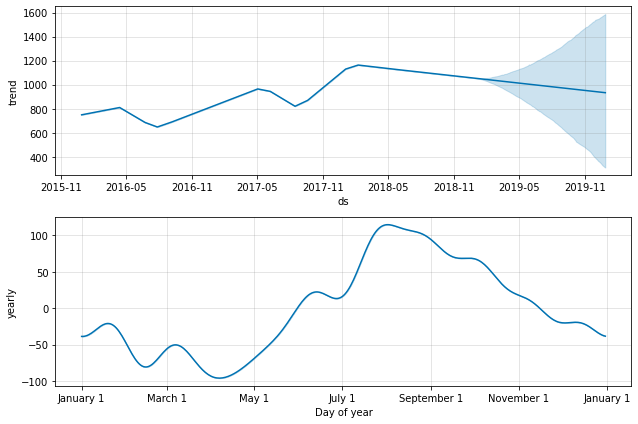

In [ ]:
m.plot_components(forecast);

### Cross-Validation

In [ ]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [ ]:
m = Prophet(weekly_seasonality=False)

In [ ]:
m.fit(goog[-252*2:])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# try period=15, horizon=30
# try period=30, horizon=60
df_cv = cross_validation(
    m,
    initial='365 days',
    period='5 days',
    horizon='5 days')

INFO:prophet:Making 73 forecasts with cutoffs between 2017-12-28 00:00:00 and 2018-12-23 00:00:00


In [ ]:
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-12-29,1065.975808,1052.524146,1080.509215,1046.400024,2017-12-28
1,2018-01-02,1070.092359,1055.227870,1084.942000,1065.000000,2017-12-28
2,2018-01-03,1065.833243,1051.492109,1079.328610,1082.479980,2018-01-02
3,2018-01-04,1066.915512,1052.859697,1080.992233,1086.400024,2018-01-02
4,2018-01-05,1068.098243,1053.800061,1080.984380,1102.229980,2018-01-02
5,2018-01-08,1086.250904,1071.450481,1099.969291,1106.939941,2018-01-07
6,2018-01-09,1088.064811,1074.523102,1101.841513,1106.260010,2018-01-07
7,2018-01-10,1089.848894,1076.315498,1104.351597,1102.609985,2018-01-07
8,2018-01-11,1091.583641,1078.009877,1105.067980,1105.520020,2018-01-07
9,2018-01-12,1093.248978,1078.932098,1106.922990,1122.260010,2018-01-07


In [ ]:
df_cv.shape

(251, 6)

In [ ]:
naive = df_cv[['ds', 'yhat', 'y', 'cutoff']].copy()

In [ ]:
naive_storage = np.zeros(naive.shape[0])
one_day = pd.Timedelta(1, 'day')
for i, row in naive.iterrows():
  cutoff = row['cutoff']
  # print(cutoff)

  # must find last cutoff that actually exists in df
  while cutoff not in goog.index:
    cutoff = cutoff - one_day

  naive_storage[i] = goog.loc[cutoff]['y']

naive['yhat'] = naive_storage

In [ ]:
pm = performance_metrics(df_cv)
pm['smape'].mean()

0.031127336636832887

In [ ]:
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()

0.020548255026447006

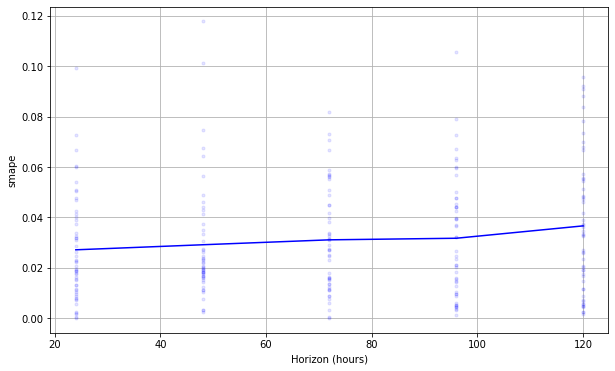

In [ ]:
plot_cross_validation_metric(df_cv, metric='smape');

### Cross-Validation with Logged Data

In [ ]:
log_goog = goog.copy()
log_goog['y'] = np.log(goog['y'])

In [ ]:
m = Prophet(weekly_seasonality=False)
m.fit(log_goog[-252*2:])
df_cv = cross_validation(
    m,
    initial='365 days',
    period='30 days',
    horizon='60 days')
pm = performance_metrics(df_cv)
pm['smape'].mean()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 11 forecasts with cutoffs between 2018-01-02 00:00:00 and 2018-10-29 00:00:00


0.014569461446070719

In [ ]:
naive = df_cv[['ds', 'yhat', 'y', 'cutoff']].copy()
naive_storage = np.zeros(naive.shape[0])
for i, row in naive.iterrows():
  cutoff = row['cutoff']
  # print(cutoff)

  # must find last cutoff that actually exists in df
  while cutoff not in goog.index:
    cutoff = cutoff - pd.Timedelta(1, 'day')

  naive_storage[i] = log_goog.loc[cutoff]['y']

naive['yhat'] = naive_storage
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()

0.008361150811971337

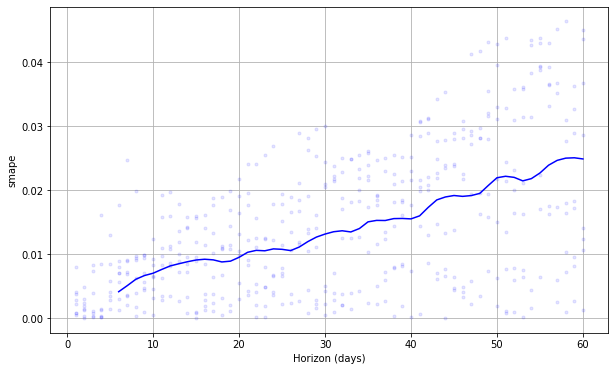

In [ ]:
plot_cross_validation_metric(df_cv, metric='smape');